In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=0.3)
x, y

(array([[-1.46691959, -0.52066795],
        [ 0.34530624, -0.84106466],
        [ 1.09700277, -0.17858419],
        ...,
        [ 0.20916152,  0.46918217],
        [ 0.3955843 ,  0.14620546],
        [ 0.47751787,  0.67394753]]),
 array([-1.03444241e+02,  5.42885749e+00,  6.62334532e+01, -1.34873994e+01,
        -1.27083505e+01, -2.54482193e+01, -5.91783499e+01,  5.03467620e+01,
         8.82348527e+01,  4.11459334e-01,  4.06894306e+01,  3.34841078e+01,
        -3.73860811e+00,  4.68771974e+01, -8.75736271e+01, -2.79547502e+01,
         1.53371911e+02,  1.15670565e+01,  2.16042888e+01, -1.23839974e+01,
        -1.14699184e+02, -6.61224402e+01,  5.37292781e+01, -6.28954522e+00,
        -2.14617185e+01,  1.38732933e+02, -4.62403054e+01, -6.91047568e+01,
        -6.44248752e+01, -4.47325214e+01, -1.15278504e+02,  1.16037398e+02,
        -1.66355081e+01, -5.10411563e+00,  1.23003810e+02, -2.11606115e+01,
        -5.73644186e+01, -1.01560462e+02,  2.70041208e+01, -1.41386753e+01,
        -

<Axes: xlabel='0', ylabel='1'>

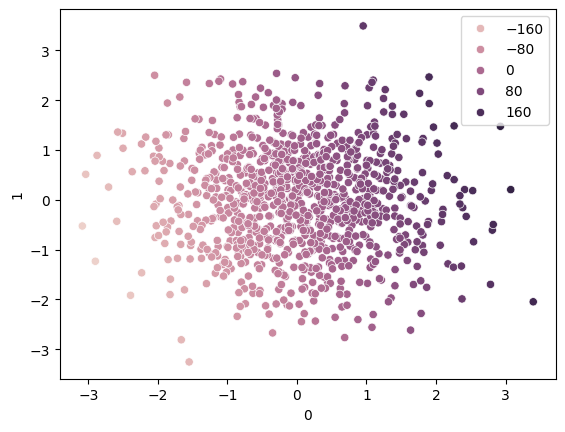

In [6]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, y_train.shape

((700, 2), (700,))

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor

SVR(kernel='linear')

In [9]:
regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [11]:
y_pred = regressor.predict(x_test)
y_pred.shape

(300,)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.999982042570004

In [25]:
from sklearn.model_selection import GridSearchCV
params = {
    "C":[1,2,0.9,1.1],
    "gamma":[0.1,0.09,0.11,0.085],
    "kernel":["linear"],
    "epsilon":[0.1,0.09,0.11,0.085]
}

In [22]:
model = GridSearchCV(estimator=regressor, param_grid=params, verbose=3, cv=5)
model

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 2, 0.9, 1.1],
                         'epsilon': [0.1, 0.09, 0.11, 0.085],
                         'gamma': [0.1, 0.09, 0.11, 0.085],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.09, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.09, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.09, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.09, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.09, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.11, 

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 2, 0.9, 1.1],
                         'epsilon': [0.1, 0.09, 0.11, 0.085],
                         'gamma': [0.1, 0.09, 0.11, 0.085],
                         'kernel': ['linear']},
             verbose=3)

In [26]:
model.best_params_

{'C': 2, 'epsilon': 0.11, 'gamma': 0.1, 'kernel': 'linear'}

In [27]:
model.best_score_

np.float64(0.9999778022642059)

In [28]:
new_model = model.best_estimator_
new_model

SVR(C=2, epsilon=0.11, gamma=0.1, kernel='linear')

In [29]:
y_pred_new = new_model.predict(x_test)
y_pred_new

array([-6.48299901e+01,  3.68840203e+00, -7.94758972e+01, -1.04703908e+02,
        6.83391111e+01, -2.16257621e+01,  9.04390850e+00,  4.27657655e+01,
        2.64796550e+01, -1.70098216e+01, -5.07634378e+01, -5.93296502e+01,
        9.17267730e+01, -6.85286191e+00, -1.37539617e+01, -2.86566552e+01,
       -1.13443281e+02, -5.90586503e+01, -5.94021709e+01, -7.41875800e+01,
        1.91812818e+01, -6.57951695e+01,  6.47714551e+01,  6.25084638e+01,
       -2.30478114e+01, -1.12848745e+02, -9.27206111e+01, -3.36069944e+01,
       -2.52833213e+01,  1.94072580e+01, -6.47333489e+01,  3.15810654e+01,
       -6.31559627e+01,  4.24500454e+01, -4.44653994e+01,  6.11711660e+01,
        5.76072878e+01,  3.44497426e+01, -3.33522386e+01,  6.72836004e+01,
       -9.01631247e+01,  2.30270717e+00,  7.47934838e+01,  1.59911032e+01,
       -5.32433386e+00,  2.04663464e+01,  1.00849207e+02, -8.07444427e+01,
        6.71004159e+01, -1.93595570e+01, -6.28653504e+00,  1.23468154e+02,
        4.60657220e+01, -

In [30]:
r2_score(y_test, y_pred_new) #0.999982042570004

0.9999821984156613